In [1]:
import torch
import sbibm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import pickle
import os

sns.set_theme()

/home/srayan/miniconda3/envs/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/tmp/ipykernel_1096282/1818633200.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="T", y="dist", ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_1096282/1818633200.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="T", y="dist", ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_1096282/1818633200.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="T", y="dist", ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_1096282/1818633200.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="T", y="dist", ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_1096282/1818633200.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="T", y="dist", ax=ax, legend=False, palette=

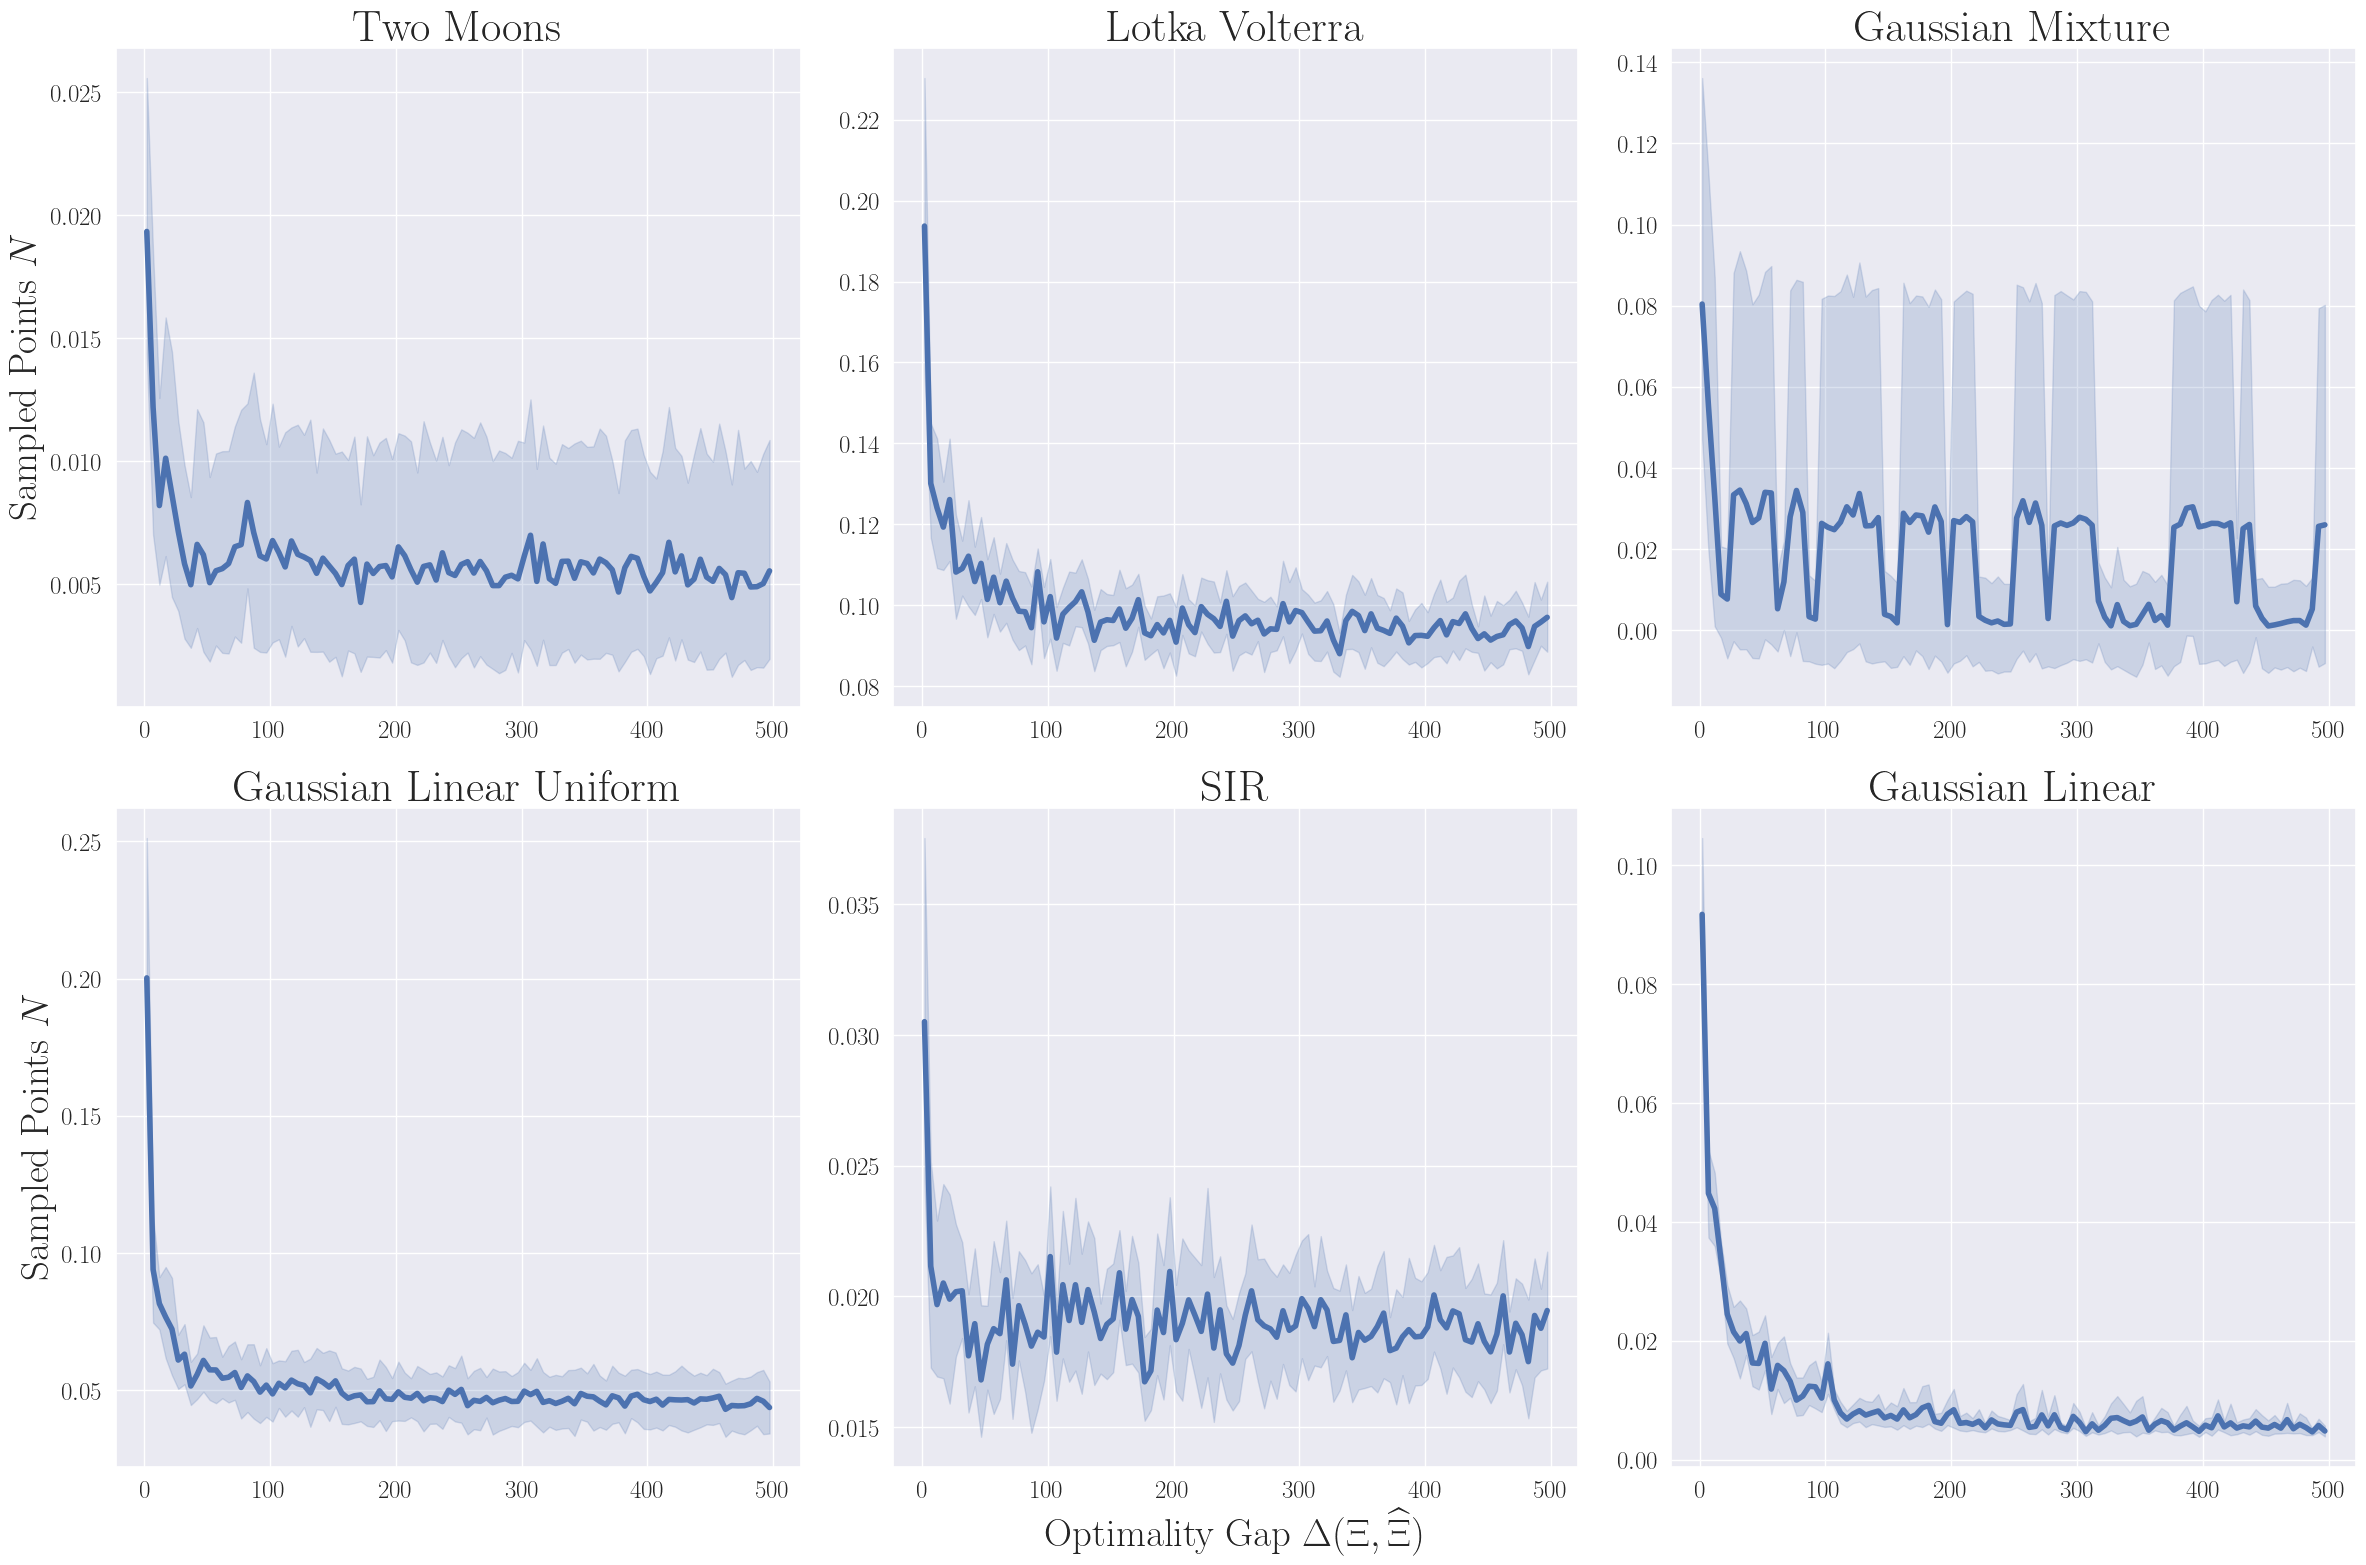

In [3]:
task_names = [
    "two_moons",
    "lotka_volterra",
    "gaussian_mixture",
    "gaussian_linear_uniform",
    "sir",
    "gaussian_linear",
]

task_name_titles = [
    'Two Moons',
    'Lotka Volterra',
    'Gaussian Mixture',
    'Gaussian Linear Uniform',
    'SIR',
    'Gaussian Linear',
]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,16))
# axs[0].set_ylabel("$\mathbb{E}_X[\mathcal{L}(\cdot)]$",fontsize=24)
for i, task_name in enumerate(task_names):
    ax = axs[i // 3, i - 3 * (i // 3)]
    
    ax.set_title(task_name_titles[i], fontsize=32)
    
    if i == 4:
        ax.set_xlabel(r"Optimality Gap $\Delta(\Xi, \widehat{\Xi})$",fontsize=28)
    else:
        ax.set_xlabel(" ")

    if i == 0 or i == 3:
        ax.set_ylabel("Sampled Points $N$",fontsize=28)
    else:
        ax.set_ylabel(" ")
    
    dists_trials = []
    for i in range(10):
        fn = os.path.join("results", "dists", f"{task_name}_{i}.pkl")
        if not os.path.exists(fn):
            break
        
        with open(fn, "rb") as f:
            Ts, dists = pickle.load(f)
            dists_trials.append(dists)
    
    full_Ts = np.hstack([Ts] * len(dists_trials))
    full_dists = np.hstack(dists_trials)

    df = pd.DataFrame()
    df["T"] = full_Ts
    df["dist"] = full_dists
    df["idx"] = np.hstack([[i] * len(Ts) for i in range(len(dists_trials))])

    sns.lineplot(data=df, x="T", y="dist", ax=ax, legend=False, palette="flare", lw=4)
plt.tight_layout()
plt.savefig(f"distances.png")

/tmp/ipykernel_503730/2356733723.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=x, y=y, ax=ax, legend=False, palette="flare", lw=4, ci='sd')
/tmp/ipykernel_503730/2356733723.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, ax=ax, legend=False, palette="flare", lw=4, ci='sd')
/tmp/ipykernel_503730/2356733723.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=x, y=y, ax=ax, legend=False, palette="flare", lw=4, ci='sd')
/tmp/ipykernel_503730/2356733723.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, ax=ax, legend=False, palette="flare", lw=4, ci='sd')
/tmp/ipykernel_503730/2356733723.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=x, y=y, ax=ax, legend=False, palette="

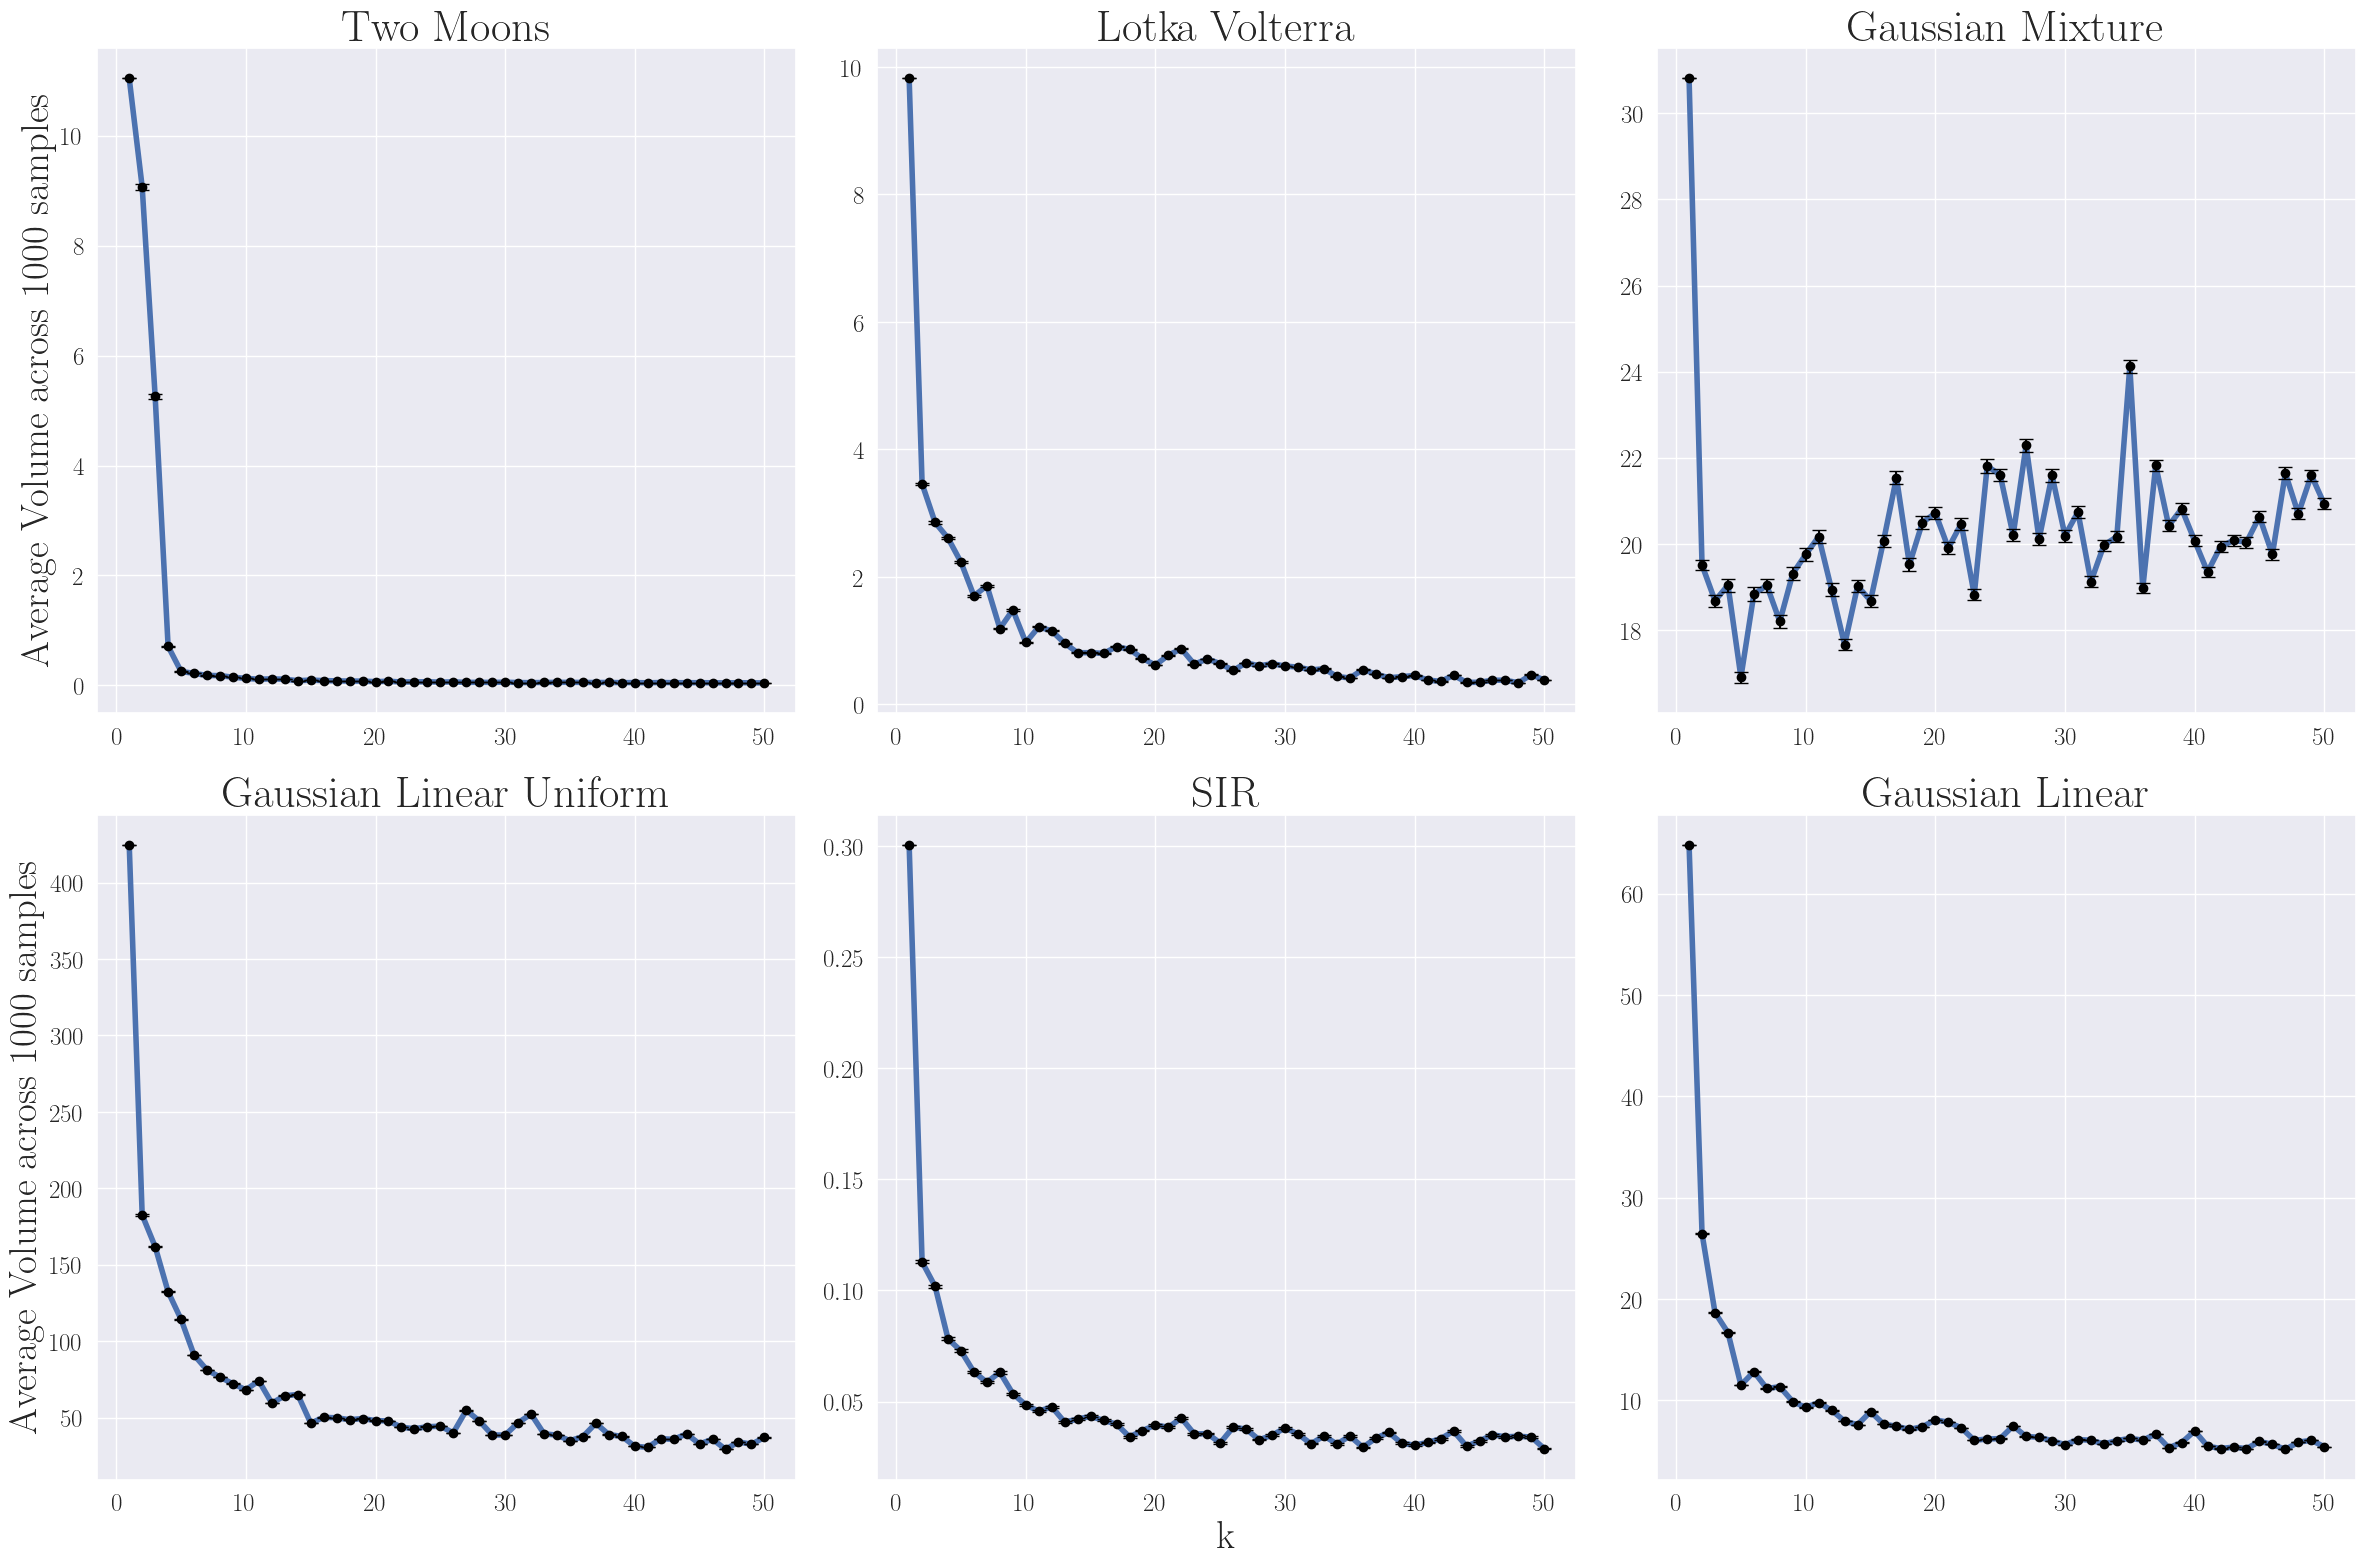

In [8]:
task_names = [
    "two_moons",
    "lotka_volterra",
    "gaussian_mixture",
    "gaussian_linear_uniform",
    "sir",
    "gaussian_linear",
]

task_name_titles = [
    'Two Moons',
    'Lotka Volterra',
    'Gaussian Mixture',
    'Gaussian Linear Uniform',
    'SIR',
    'Gaussian Linear',
]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,16))
# axs[0].set_ylabel("$\mathbb{E}_X[\mathcal{L}(\cdot)]$",fontsize=24)
for i, task_name in enumerate(task_names):
    ax = axs[i // 3, i - 3 * (i // 3)]
    
    ax.set_title(task_name_titles[i], fontsize=32)
    
    if i == 4:
        ax.set_xlabel(r"k",fontsize=28)
    else:
        ax.set_xlabel(" ")

    if i == 0 or i == 3:
        ax.set_ylabel("Average Volume across $1000$ samples",fontsize=28)
    else:
        ax.set_ylabel(" ")
    path_label = os.path.join("..", "conformal-po","results", task_name, "volumes.npy")
    volumes = np.load(path_label)
    n, k = volumes.shape
    x = np.arange(1, k+1)
    y = np.mean(volumes, axis=0)
    yerr = np.std(volumes, axis=0) / np.sqrt(n)
    # with open(os.path.join("..", "conformal-po","results", f"{task_name}.pkl"), "rb") as f:
    #     Ts, dists = pickle.load(f)
    sns.lineplot(x=x, y=y, ax=ax, legend=False, palette="flare", lw=4, ci='sd')
    # sns.despine()
    ax.errorbar(x, y, yerr=yerr, fmt='o', color='black', ecolor='black', capsize=5)
    # sns.scatterplot(x=x, y=y, ax=ax, legend=False, palette="flare", s=100)
plt.tight_layout()
plt.savefig(f"avg_volume.png")